In [1]:
import numpy as np
import pandas as pd
import csv
from sklearn.model_selection import train_test_split, cross_validate, StratifiedShuffleSplit
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler
from sklearn.preprocessing import PowerTransformer, QuantileTransformer, Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_fscore_support
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold,LeaveOneOut, StratifiedKFold
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.pipeline import Pipeline
from sklearn.metrics import roc_curve
from scipy import stats

In [2]:
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/home/zandred/environments/df_final_model.csv')

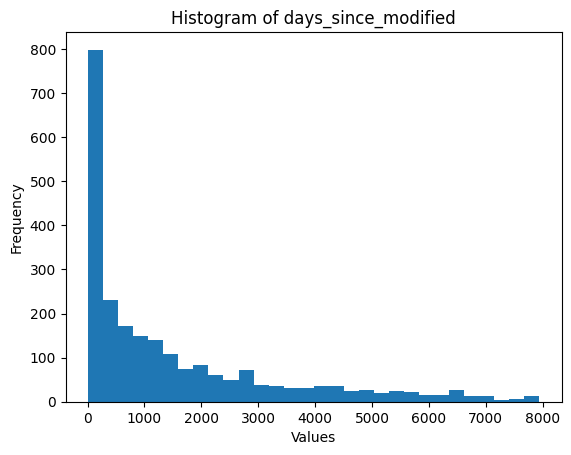

Shapiro-Wilk for days_since_modified:
Statistic: 0.7929
p-value: 0.0000

D'Agostino-Pearson for days_since_modified:
Statistic: 572.6674
p-value: 0.0000

Anderson-Darling for days_since_modified:
Statistic: 169.2224
Critical Values: [0.575 0.655 0.786 0.916 1.09 ]
Significance Levels: [15.  10.   5.   2.5  1. ]



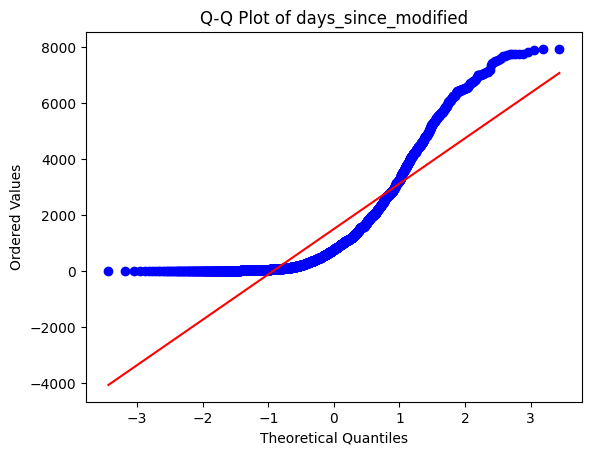

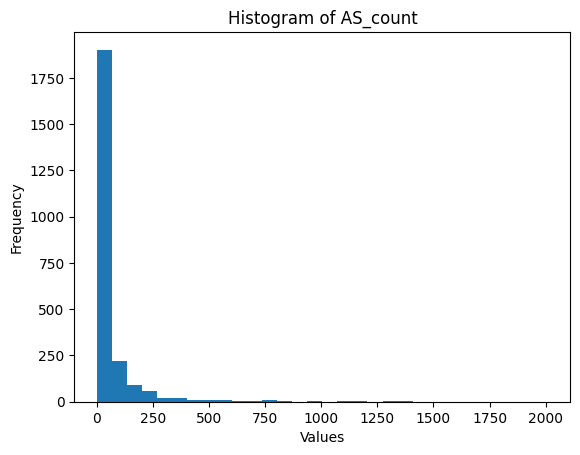

Shapiro-Wilk for AS_count:
Statistic: 0.3991
p-value: 0.0000

D'Agostino-Pearson for AS_count:
Statistic: 2665.6352
p-value: 0.0000

Anderson-Darling for AS_count:
Statistic: 453.7746
Critical Values: [0.575 0.655 0.786 0.916 1.09 ]
Significance Levels: [15.  10.   5.   2.5  1. ]



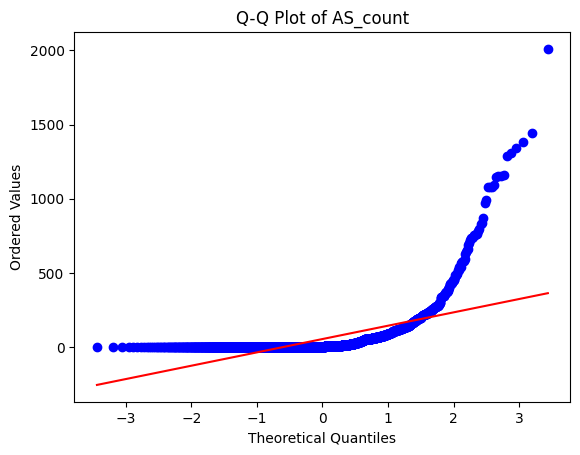

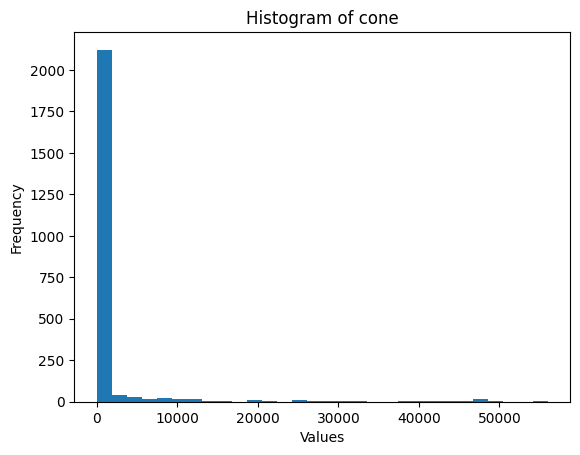

Shapiro-Wilk for cone:
Statistic: 0.2856
p-value: 0.0000

D'Agostino-Pearson for cone:
Statistic: 2291.1859
p-value: 0.0000

Anderson-Darling for cone:
Statistic: 693.5783
Critical Values: [0.575 0.655 0.786 0.916 1.09 ]
Significance Levels: [15.  10.   5.   2.5  1. ]



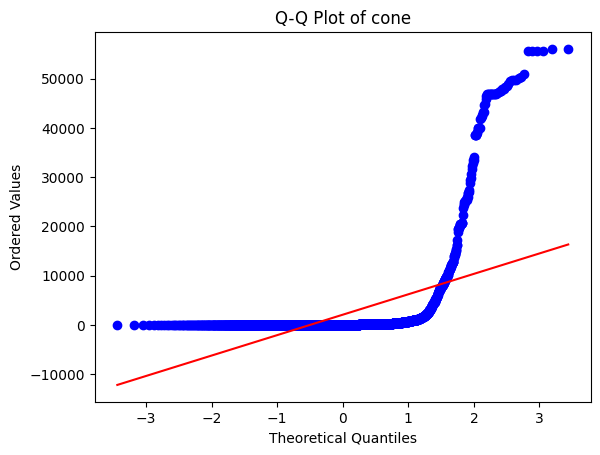

In [4]:
# Select the features of interest from the DataFrame
features = ['days_since_modified', 'AS_count', 'cone',]
data = df[features]

# Loop over each feature and check the distribution type
for feature in features:
    # Extract the data for the current feature
    feature_data = data[feature]

    # Plot a histogram
    plt.hist(feature_data, bins=30)
    plt.xlabel('Values')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

    # Perform normality tests
    normality_tests = {
        'Shapiro-Wilk': stats.shapiro,
        'D\'Agostino-Pearson': stats.normaltest,
        'Anderson-Darling': stats.anderson
    }

    for test_name, test_func in normality_tests.items():
        if test_name == 'Anderson-Darling':
            statistic, critical_values, significance_levels = test_func(feature_data)
            print(f'{test_name} for {feature}:')
            print(f'Statistic: {statistic:.4f}')
            print(f'Critical Values: {critical_values}')
            print(f'Significance Levels: {significance_levels}')
        else:
            statistic, p_value = test_func(feature_data)
            print(f'{test_name} for {feature}:')
            print(f'Statistic: {statistic:.4f}')
            print(f'p-value: {p_value:.4f}')
        print('')

    # Visualize a Q-Q plot
    stats.probplot(feature_data, dist="norm", plot=plt)
    plt.xlabel('Theoretical Quantiles')
    plt.ylabel('Ordered Values')
    plt.title(f'Q-Q Plot of {feature}')
    plt.show()


In [3]:
df

,as-set,processed_as_set,descr,members,mnt_by,AS_count,cone,days_since_modified,class,relationship,keyword_present,AS_Count_size,Cone_size,only_asn
0,as-set-link,"['set', 'link']",[],"['as-konnektikaru', 'as211366', 'as61230']",['link'],3,5,553,0,0.600000,0,1,1,0
1,as-mobitex,['mobitex'],"['as', 'number', 'announced', 'mobitex']",['as57897'],['dcenter'],1,1,2381,1,1.000000,0,0,1,1
2,as-active-fibre,"['active', 'fibre']","['as', 'announcement', 'af']",['as328068'],['as328068'],1,1,268,0,1.000000,0,0,1,1
3,as-swcmcustomers,['swcmcustomers'],"['legacy', 'object', 'please', 'use', 'as3303'...","['as3303', 'as-swcmcustomers']","['ch', 'unisource']",2,1,116,1,2.000000,1,1,1,0
4,as-60139,['60139'],"['customer', 'sever', 'telecom', 'global', 'ac...","['as60139', 'as50736', 'as197780', 'as48180']","['sever', 'telecom']",4,4,1503,0,1.000000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2365,as394127:as-all,"['as394127', 'all']","['360', 'e', '10th', 'ave']",['as394127'],"['ars', '108']",1,1,1082,0,1.000000,0,0,1,1
2366,as-avmcau,['avmcau'],"['as', 'avmcau']",['as132430'],"['avmc', 'au']",1,1,196,0,1.000000,0,0,1,1
2367,as11996:as-cust1,"['as11996', 'cust1']","['po', 'box', '1761']","['as33201', 'as-all', 'as10381', 'as-swcp', 'a...","['lisl', '2']",9,7,698,1,1.285714,0,1,1,0
2368,as264646:as-tierranet,"['as264646', 'tierranet']","['dobleclick', 'software', 'e', 'ingeneria']",['as269746'],"['co', 'dsin']",1,1,27,0,1.000000,0,0,1,1


Results for KNN:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Mean accuracy: 0.8708860759493671
Mean precision: 0.8751683172172952
Mean recall: 0.8708860759493671
Mean F1-score: 0.8599645013823018
Mean ROC AUC: 0.848219642396321
Results for Decision Tree:
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean accuracy: 0.8628691983122362
Mean precision: 0.8585766663981336
Mean recall: 0.8628691983122362
Mean F1-score: 0.8591134818434055
Mean ROC AUC: 0.8252679732440467
Results for Random Forest:
Best Parameters: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Mean accuracy: 0.8751054852320677
Mean precision: 0.8788124043576919
Mean recall: 0.8751054852320677
Mean F1-score: 0.8668127051101291
Mean ROC AUC: 0.880238455899266
Results for XGBoost:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators':

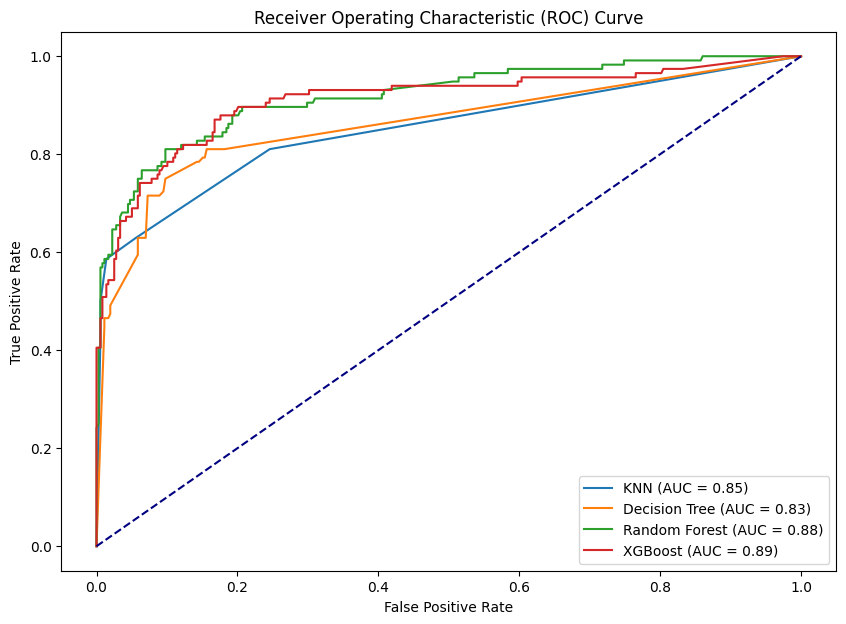

In [11]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the transformer
transformer = PowerTransformer()

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Transform only specific features
        X_train[['days_since_modified', 'AS_count', 'cone']] = transformer.fit_transform(X_train[['days_since_modified', 'AS_count', 'cone']])
        X_test[['days_since_modified', 'AS_count', 'cone']] = transformer.transform(X_test[['days_since_modified', 'AS_count', 'cone']])

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'),
            param_grid, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = grid.best_params_

        # Train the model using the best parameters
        best_model = Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters)
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)

        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Results for KNN:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Mean accuracy: 0.8662447257383967
Mean precision: 0.8714232150290263
Mean recall: 0.8662447257383967
Mean F1-score: 0.8569879183926155
Mean ROC AUC: 0.8377310026340995
Results for Decision Tree:
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean accuracy: 0.8489451476793249
Mean precision: 0.8481032957110204
Mean recall: 0.8489451476793249
Mean F1-score: 0.8460446757414216
Mean ROC AUC: 0.8001953626873093
Results for Random Forest:
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean accuracy: 0.8772151898734176
Mean precision: 0.8804797269091618
Mean recall: 0.8772151898734176
Mean F1-score: 0.8689199235438846
Mean ROC AUC: 0.8774960701283631
Results for XGBoost:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimator

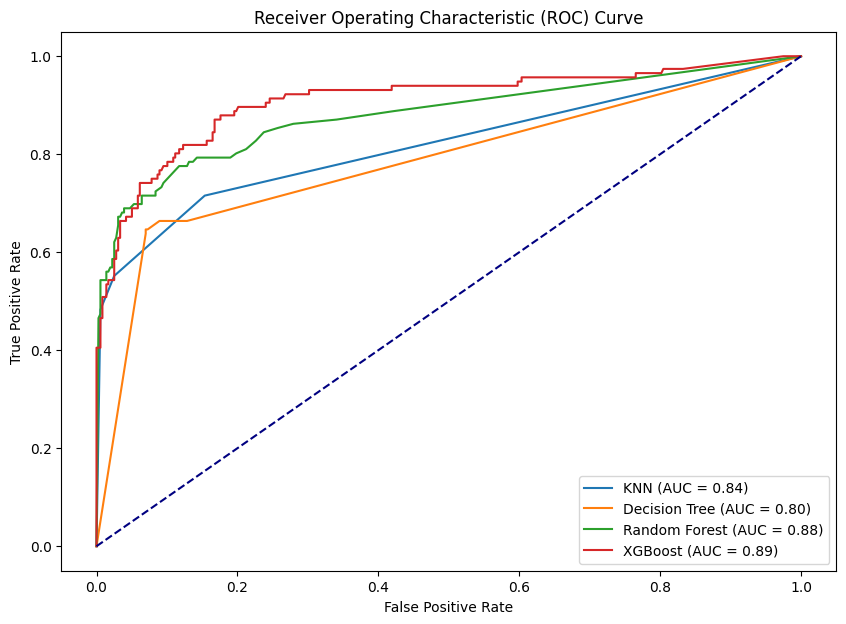

In [13]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply log transform on specific features
        X_train[['days_since_modified', 'AS_count', 'cone']] = np.log1p(X_train[['days_since_modified', 'AS_count', 'cone']])
        X_test[['days_since_modified', 'AS_count', 'cone']] = np.log1p(X_test[['days_since_modified', 'AS_count', 'cone']])

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'),
            param_grid, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = grid.best_params_

        # Train the model using the best parameters
        best_model = Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters)
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)

        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Results for KNN:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
Mean accuracy: 0.8725738396624472
Mean precision: 0.8748443652338332
Mean recall: 0.8725738396624472
Mean F1-score: 0.8618620000695312
Mean ROC AUC: 0.8453868088597739
Results for Decision Tree:
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean accuracy: 0.8624472573839663
Mean precision: 0.8601960596999942
Mean recall: 0.8624472573839663
Mean F1-score: 0.8585300300191683
Mean ROC AUC: 0.8277026649448963
Results for Random Forest:
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean accuracy: 0.8734177215189873
Mean precision: 0.8775422491450888
Mean recall: 0.8734177215189873
Mean F1-score: 0.8654192859817502
Mean ROC AUC: 0.8841742408623267
Results for XGBoost:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 17, 'n_est

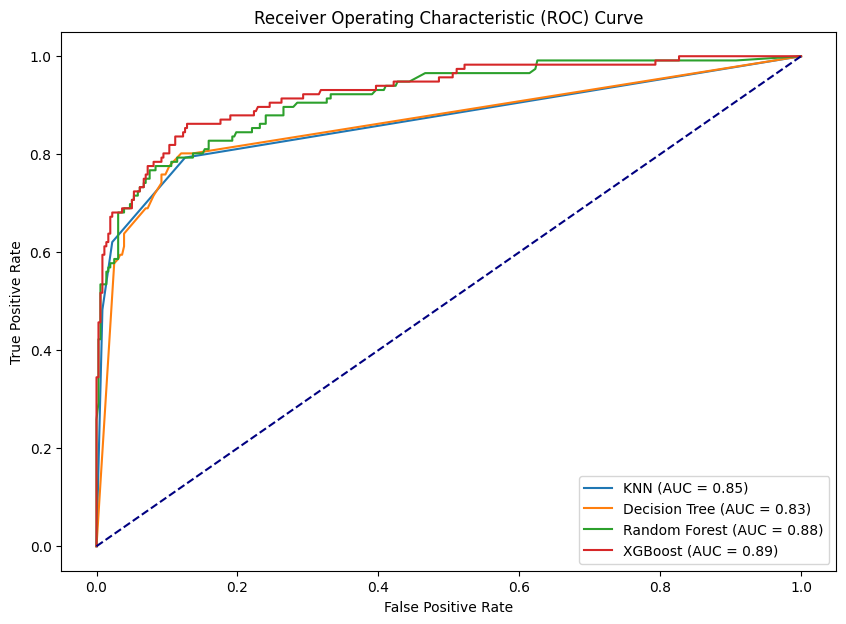

In [14]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the transformer
transformer = QuantileTransformer()

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Transform only specific features
        X_train[['days_since_modified', 'AS_count', 'cone']] = transformer.fit_transform(X_train[['days_since_modified', 'AS_count', 'cone']])
        X_test[['days_since_modified', 'AS_count', 'cone']] = transformer.transform(X_test[['days_since_modified', 'AS_count', 'cone']])

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'),
            param_grid, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = grid.best_params_

        # Train the model using the best parameters
        best_model = Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters)
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)

        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the transformer
transformer = QuantileTransformer()

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=10)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Transform only specific features
        X_train[['days_since_modified', 'AS_count', 'cone']] = transformer.fit_transform(X_train[['days_since_modified', 'AS_count', 'cone']])
        X_test[['days_since_modified', 'AS_count', 'cone']] = transformer.transform(X_test[['days_since_modified', 'AS_count', 'cone']])

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=10)

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'),
            param_grid, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = grid.best_params_

        # Train the model using the best parameters
        best_model = Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters)
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)

        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Results for KNN:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
Mean accuracy: 0.8746835443037975
Mean precision: 0.8731791599859469
Mean recall: 0.8746835443037975
Mean F1-score: 0.8635551842391506
Mean ROC AUC: 0.8524102388186481
Results for Decision Tree:
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean accuracy: 0.8675105485232069
Mean precision: 0.867791849783935
Mean recall: 0.8675105485232069
Mean F1-score: 0.8635122662979988
Mean ROC AUC: 0.8345295407443458
Results for Random Forest:
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Mean accuracy: 0.8772151898734176
Mean precision: 0.8775589037846304
Mean recall: 0.8772151898734176
Mean F1-score: 0.8686555331730123
Mean ROC AUC: 0.8861448176725123


In [ ]:
#no scaling

Results for KNN:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Mean accuracy: 0.7565400843881857
Mean precision: 0.7483436118445834
Mean recall: 0.7565400843881857
Mean F1-score: 0.747532455989621
Mean ROC AUC: 0.6970958460328822
Results for Decision Tree:
Best Parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean accuracy: 0.8590717299578058
Mean precision: 0.8546915688718487
Mean recall: 0.8590717299578058
Mean F1-score: 0.855528399523617
Mean ROC AUC: 0.8202542728495699
Results for Random Forest:
Best Parameters: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 300}
Mean accuracy: 0.8759493670886076
Mean precision: 0.8798738831177075
Mean recall: 0.8759493670886076
Mean F1-score: 0.8675612037657447
Mean ROC AUC: 0.8778411962884588
Results for XGBoost:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators

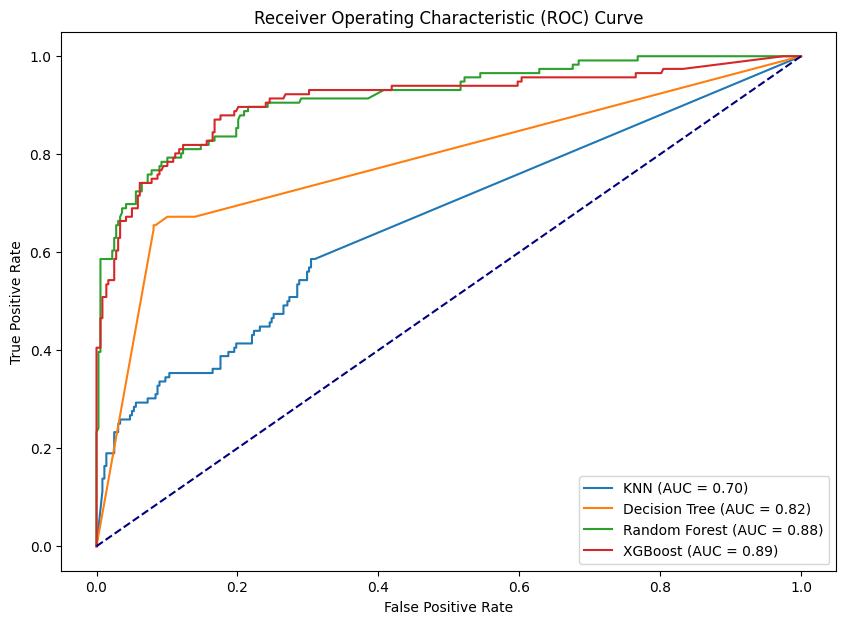

In [15]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'),
            param_grid, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = grid.best_params_

        # Train the model using the best parameters
        best_model = Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters)
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)

        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#UNDERSAMPLING

Results for KNN:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
Mean accuracy: 0.8219409282700422
Mean precision: 0.8426815180391513
Mean recall: 0.8219409282700422
Mean F1-score: 0.8259775552393362
Mean ROC AUC: 0.858180591334715
Results for Decision Tree:
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean accuracy: 0.808860759493671
Mean precision: 0.8466587049112354
Mean recall: 0.808860759493671
Mean F1-score: 0.8176319856546442
Mean ROC AUC: 0.8441182945664778
Results for Random Forest:
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mean accuracy: 0.849367088607595
Mean precision: 0.865129837630531
Mean recall: 0.849367088607595
Mean F1-score: 0.8513511232851719
Mean ROC AUC: 0.8936964337504143
Results for XGBoost:
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 30

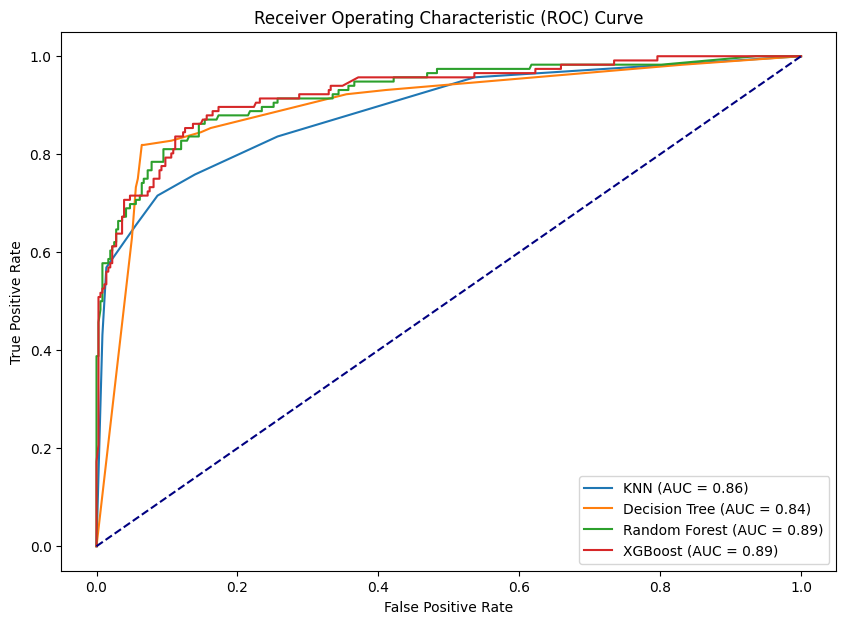

In [16]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the scaler
scaler = PowerTransformer(method='yeo-johnson', standardize=True)

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scale only specific features
        X_train[['days_since_modified', 'AS_count', 'cone']] = scaler.fit_transform(X_train[['days_since_modified', 'AS_count', 'cone']])
        X_test[['days_since_modified', 'AS_count', 'cone']] = scaler.transform(X_test[['days_since_modified', 'AS_count', 'cone']])

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Define the undersampler
        undersampler = RandomUnderSampler()

        # Define the pipeline with undersampling and the classifier
        pipeline = Pipeline([
            ('undersample', undersampler),
            ('classifier', Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'))
        ])

        # Update the parameter grid to work with the pipeline
        param_grid_pipeline = {f"classifier__{key}": value for key, value in param_grid.items()}

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            pipeline,
            param_grid_pipeline, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = {key.replace("classifier__", ""): value for key, value in grid.best_params_.items()}

        # Train the model using the best parameters
        best_model = Pipeline([
            ('undersample', undersampler),
            ('classifier', Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters))
        ])
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)
        
        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Results for KNN:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Mean accuracy: 0.8358649789029536
Mean precision: 0.8565649844031601
Mean recall: 0.8358649789029536
Mean F1-score: 0.8371237709354136
Mean ROC AUC: 0.868871123680935
Results for Decision Tree:
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean accuracy: 0.8194092827004219
Mean precision: 0.83825699815076
Mean recall: 0.8194092827004219
Mean F1-score: 0.8246921024160404
Mean ROC AUC: 0.8329341389746141
Results for Random Forest:
Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Mean accuracy: 0.8586497890295359
Mean precision: 0.8745276539139706
Mean recall: 0.8586497890295359
Mean F1-score: 0.859858339318943
Mean ROC AUC: 0.8964879963147852
Results for XGBoost:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 17, 'n_estimators'

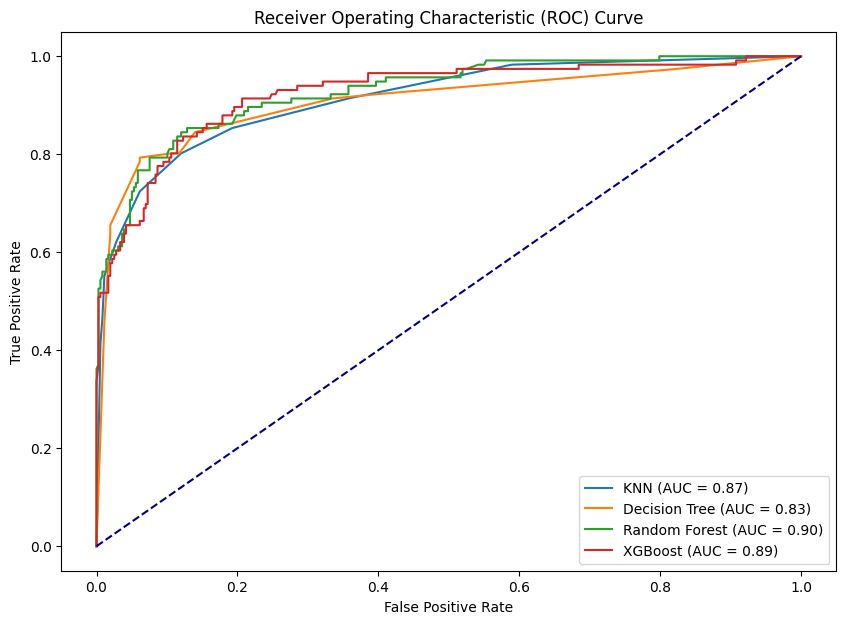

In [4]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the scaler
scaler = QuantileTransformer()
# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scale only specific features
        X_train[['days_since_modified', 'AS_count', 'cone']] = scaler.fit_transform(X_train[['days_since_modified', 'AS_count', 'cone']])
        X_test[['days_since_modified', 'AS_count', 'cone']] = scaler.transform(X_test[['days_since_modified', 'AS_count', 'cone']])

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Define the undersampler
        undersampler = RandomUnderSampler()

        # Define the pipeline with undersampling and the classifier
        pipeline = Pipeline([
            ('undersample', undersampler),
            ('classifier', Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'))
        ])

        # Update the parameter grid to work with the pipeline
        param_grid_pipeline = {f"classifier__{key}": value for key, value in param_grid.items()}

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            pipeline,
            param_grid_pipeline, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = {key.replace("classifier__", ""): value for key, value in grid.best_params_.items()}

        # Train the model using the best parameters
        best_model = Pipeline([
            ('undersample', undersampler),
            ('classifier', Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters))
        ])
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)
        
        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Results for KNN:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}
Mean accuracy: 0.80084388185654
Mean precision: 0.825662300477199
Mean recall: 0.80084388185654
Mean F1-score: 0.8064945917469328
Mean ROC AUC: 0.8392966349841995
Results for Decision Tree:
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean accuracy: 0.8253164556962025
Mean precision: 0.8452111527612907
Mean recall: 0.8253164556962025
Mean F1-score: 0.83022956640202
Mean ROC AUC: 0.8584687686812822
Results for Random Forest:
Best Parameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Mean accuracy: 0.8590717299578058
Mean precision: 0.871384093225587
Mean recall: 0.8590717299578058
Mean F1-score: 0.8610243024165248
Mean ROC AUC: 0.8895057907469601
Results for XGBoost:
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 

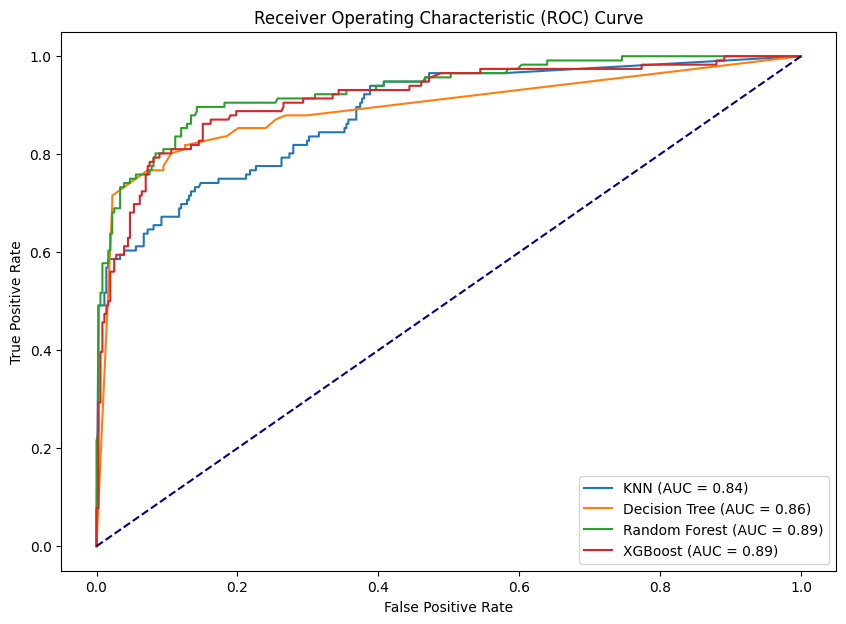

In [5]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply log transform on specific features
        X_train[['days_since_modified', 'AS_count', 'cone']] = np.log1p(X_train[['days_since_modified', 'AS_count', 'cone']])
        X_test[['days_since_modified', 'AS_count', 'cone']] = np.log1p(X_test[['days_since_modified', 'AS_count', 'cone']])

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Define the undersampler
        undersampler = RandomUnderSampler()

        # Define the pipeline with undersampling and the classifier
        pipeline = Pipeline([
            ('undersample', undersampler),
            ('classifier', Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'))
        ])

        # Update the parameter grid to work with the pipeline
        param_grid_pipeline = {f"classifier__{key}": value for key, value in param_grid.items()}

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            pipeline,
            param_grid_pipeline, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = {key.replace("classifier__", ""): value for key, value in grid.best_params_.items()}

        # Train the model using the best parameters
        best_model = Pipeline([
            ('undersample', undersampler),
            ('classifier', Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters))
        ])
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)
        
        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Results for KNN:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'uniform'}
Mean accuracy: 0.650210970464135
Mean precision: 0.7584647355507533
Mean recall: 0.650210970464135
Mean F1-score: 0.6703880851811295
Mean ROC AUC: 0.7247858238914032
Results for Decision Tree:
Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Mean accuracy: 0.8261603375527427
Mean precision: 0.8433802157384452
Mean recall: 0.8261603375527427
Mean F1-score: 0.8303813118144499
Mean ROC AUC: 0.8383670438749284
Results for Random Forest:
Best Parameters: {'bootstrap': False, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}
Mean accuracy: 0.8548523206751055
Mean precision: 0.8708734142097445
Mean recall: 0.8548523206751055
Mean F1-score: 0.8568801871285642
Mean ROC AUC: 0.8959107860286878
Results for XGBoost:
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 15, 'n_estimator

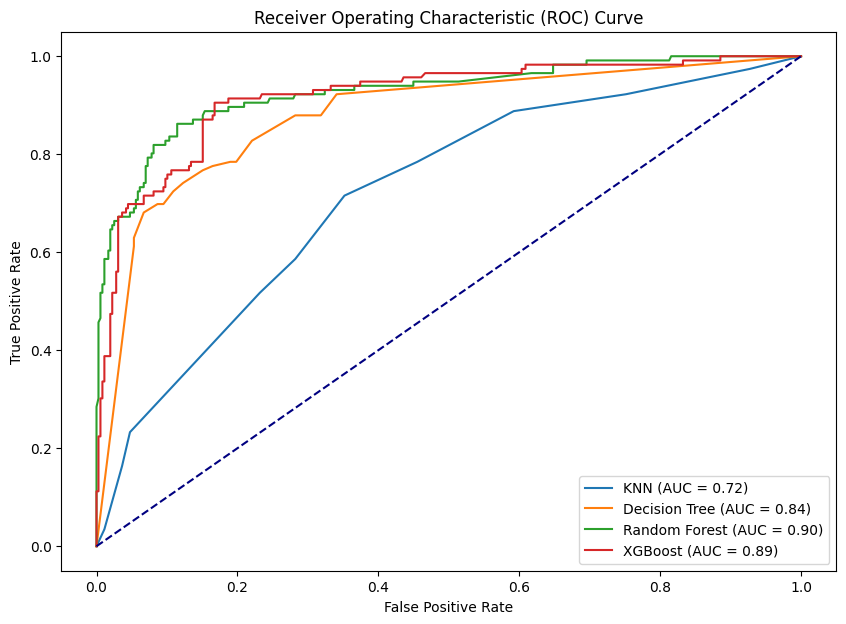

In [6]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Define the undersampler
        undersampler = RandomUnderSampler()

        # Define the pipeline with undersampling and the classifier
        pipeline = Pipeline([
            ('undersample', undersampler),
            ('classifier', Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'))
        ])

        # Update the parameter grid to work with the pipeline
        param_grid_pipeline = {f"classifier__{key}": value for key, value in param_grid.items()}

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            pipeline,
            param_grid_pipeline, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = {key.replace("classifier__", ""): value for key, value in grid.best_params_.items()}

        # Train the model using the best parameters
        best_model = Pipeline([
            ('undersample', undersampler),
            ('classifier', Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters))
        ])
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)
        
        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
#oversampling smote

Results for KNN:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}
Mean accuracy: 0.6772151898734178
Mean precision: 0.7466674451001735
Mean recall: 0.6772151898734178
Mean F1-score: 0.6919595654605614
Mean ROC AUC: 0.7107775630477349
Results for Decision Tree:
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5}
Mean accuracy: 0.8649789029535864
Mean precision: 0.869159407705552
Mean recall: 0.8649789029535864
Mean F1-score: 0.8639657510919607
Mean ROC AUC: 0.8742936057336639
Results for Random Forest:
Best Parameters: {'bootstrap': True, 'max_depth': 15, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 200}
Mean accuracy: 0.8658227848101265
Mean precision: 0.8769922778198392
Mean recall: 0.8658227848101265
Mean F1-score: 0.8645180605606051
Mean ROC AUC: 0.8965583829364165
Results for XGBoost:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 12, 'n_estimators'

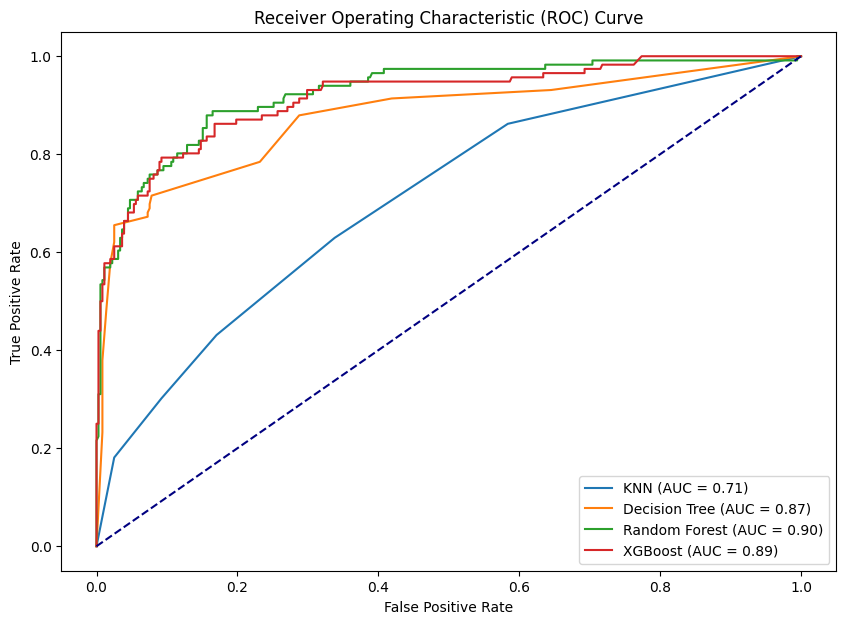

In [4]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Define the SMOTE object
        smote = SMOTE()

        # Define the pipeline with SMOTE and the classifier
        pipeline = Pipeline([
            ('smote', smote),
            ('classifier', Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'))
        ])

        # Update the parameter grid to work with the pipeline
        param_grid_pipeline = {f"classifier__{key}": value for key, value in param_grid.items()}

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            pipeline,
            param_grid_pipeline, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = {key.replace("classifier__", ""): value for key, value in grid.best_params_.items()}

        # Train the model using the best parameters
        best_model = Pipeline([
            ('smote', smote),
            ('classifier', Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters))
        ])
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)
        
        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Results for KNN:
Best Parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Mean accuracy: 0.8417721518987342
Mean precision: 0.8528740461406963
Mean recall: 0.8417721518987342
Mean F1-score: 0.8421937795547771
Mean ROC AUC: 0.8570506488053183
Results for Decision Tree:
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean accuracy: 0.8696202531645569
Mean precision: 0.8797011601758168
Mean recall: 0.8696202531645569
Mean F1-score: 0.8698685186422598
Mean ROC AUC: 0.8779570658796899
Results for Random Forest:
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
Mean accuracy: 0.870464135021097
Mean precision: 0.8804106925177727
Mean recall: 0.870464135021097
Mean F1-score: 0.8690915235808305
Mean ROC AUC: 0.892820982620375
Results for XGBoost:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 17, 'n_estimators':

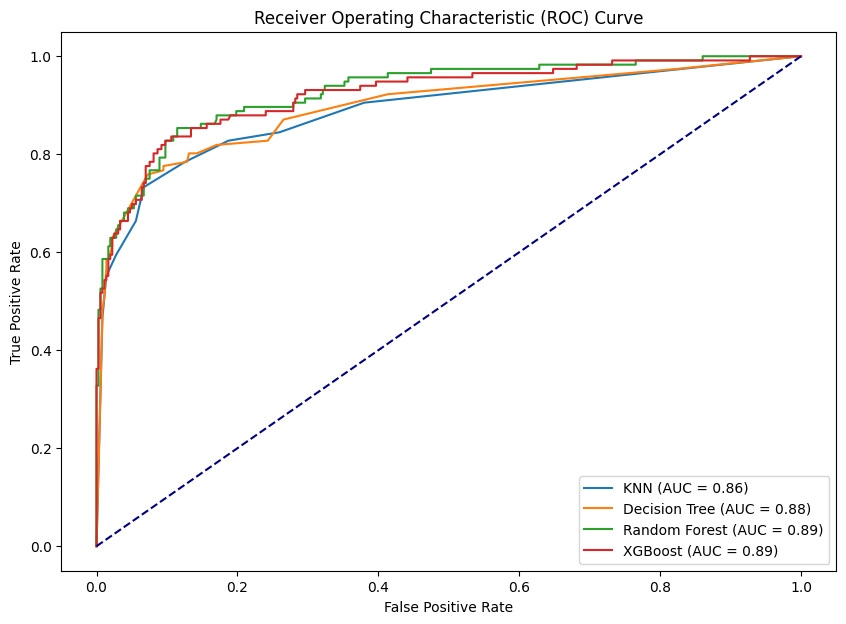

In [6]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the scaler
scaler = QuantileTransformer()

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scale only specific features
        X_train[['days_since_modified', 'AS_count', 'cone']] = scaler.fit_transform(X_train[['days_since_modified', 'AS_count', 'cone']])
        X_test[['days_since_modified', 'AS_count', 'cone']] = scaler.transform(X_test[['days_since_modified', 'AS_count', 'cone']])

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Define the SMOTE object
        smote = SMOTE()

        # Define the pipeline with SMOTE and the classifier
        pipeline = Pipeline([
            ('smote', smote),
            ('classifier', Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'))
        ])

        # Update the parameter grid to work with the pipeline
        param_grid_pipeline = {f"classifier__{key}": value for key, value in param_grid.items()}

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            pipeline,
            param_grid_pipeline, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = {key.replace("classifier__", ""): value for key, value in grid.best_params_.items()}

        # Train the model using the best parameters
        best_model = Pipeline([
            ('smote', smote),
            ('classifier', Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters))
        ])
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)
        
        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Results for KNN:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
Mean accuracy: 0.8379746835443038
Mean precision: 0.8551227973859895
Mean recall: 0.8379746835443038
Mean F1-score: 0.840460574555447
Mean ROC AUC: 0.866249525250602
Results for Decision Tree:
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Mean accuracy: 0.859071729957806
Mean precision: 0.8695528897988378
Mean recall: 0.859071729957806
Mean F1-score: 0.8584728986746331
Mean ROC AUC: 0.851324950007684
Results for Random Forest:
Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Mean accuracy: 0.8729957805907173
Mean precision: 0.8809039392205996
Mean recall: 0.8729957805907173
Mean F1-score: 0.8715064461251381
Mean ROC AUC: 0.8957313076005843
Results for XGBoost:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 13, 'n_estimators': 270

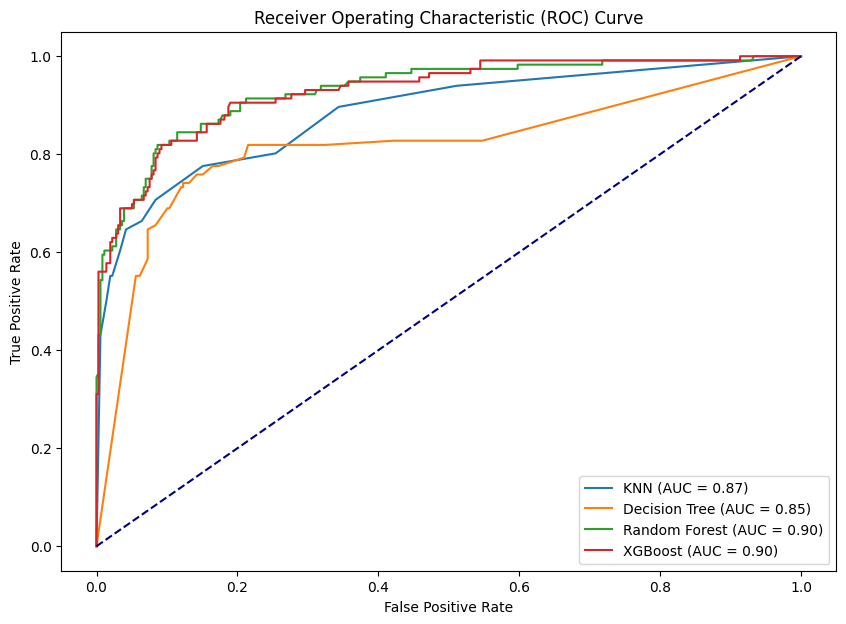

In [4]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the scaler
scaler = PowerTransformer()

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scale only specific features
        X_train[['days_since_modified', 'AS_count', 'cone']] = scaler.fit_transform(X_train[['days_since_modified', 'AS_count', 'cone']])
        X_test[['days_since_modified', 'AS_count', 'cone']] = scaler.transform(X_test[['days_since_modified', 'AS_count', 'cone']])

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Define the SMOTE object
        smote = SMOTE()

        # Define the pipeline with SMOTE and the classifier
        pipeline = Pipeline([
            ('smote', smote),
            ('classifier', Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'))
        ])

        # Update the parameter grid to work with the pipeline
        param_grid_pipeline = {f"classifier__{key}": value for key, value in param_grid.items()}

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            pipeline,
            param_grid_pipeline, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = {key.replace("classifier__", ""): value for key, value in grid.best_params_.items()}

        # Train the model using the best parameters
        best_model = Pipeline([
            ('smote', smote),
            ('classifier', Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters))
        ])
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)
        
        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Results for KNN:
Best Parameters: {'metric': 'euclidean', 'n_neighbors': 13, 'weights': 'uniform'}
Mean accuracy: 0.8413502109704641
Mean precision: 0.8552580915913461
Mean recall: 0.8413502109704641
Mean F1-score: 0.8436777057602326
Mean ROC AUC: 0.8655500859069228
Results for Decision Tree:
Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Mean accuracy: 0.8578059071729959
Mean precision: 0.8666447190221938
Mean recall: 0.8578059071729959
Mean F1-score: 0.8580521405897809
Mean ROC AUC: 0.8773242884790001
Results for Random Forest:
Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 300}
Mean accuracy: 0.8725738396624474
Mean precision: 0.881059302460051
Mean recall: 0.8725738396624474
Mean F1-score: 0.8707989208648839
Mean ROC AUC: 0.8976995732848939
Results for XGBoost:
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 17, 'n_estima

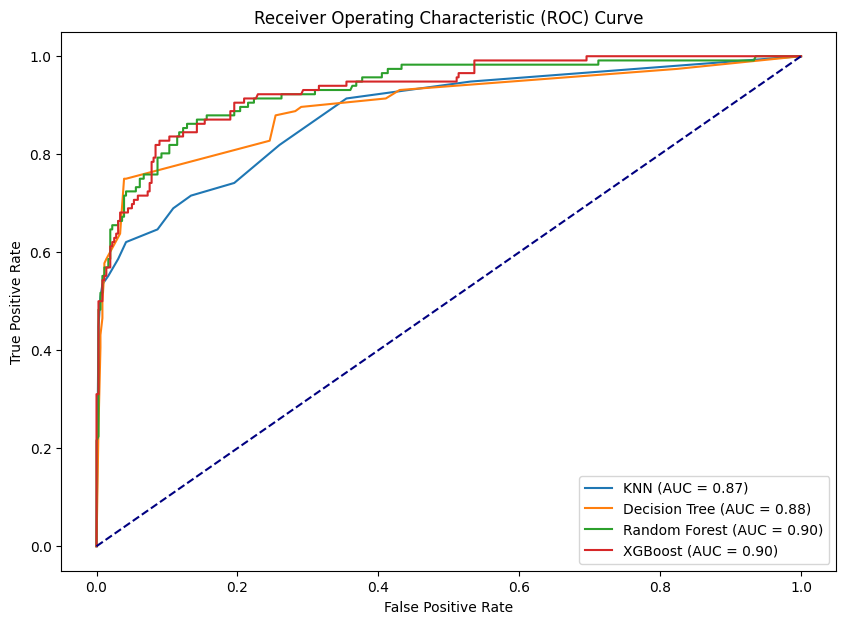

In [5]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Apply log transform on specific features
        X_train[['days_since_modified', 'AS_count', 'cone']] = np.log1p(X_train[['days_since_modified', 'AS_count', 'cone']])
        X_test[['days_since_modified', 'AS_count', 'cone']] = np.log1p(X_test[['days_since_modified', 'AS_count', 'cone']])

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Define the SMOTE object
        smote = SMOTE()

        # Define the pipeline with SMOTE and the classifier
        pipeline = Pipeline([
            ('smote', smote),
            ('classifier', Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'))
        ])

        # Update the parameter grid to work with the pipeline
        param_grid_pipeline = {f"classifier__{key}": value for key, value in param_grid.items()}

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            pipeline,
            param_grid_pipeline, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = {key.replace("classifier__", ""): value for key, value in grid.best_params_.items()}

        # Train the model using the best parameters
        best_model = Pipeline([
            ('smote', smote),
            ('classifier', Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters))
        ])
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)
        
        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Assuming df is your DataFrame
X = df[['days_since_modified', 'AS_count', 'cone', 'relationship', 'only_asn', 'keyword_present']]
y = df['class']

# Define the scaler
scaler = PowerTransformer()

# Define the classifiers to try
classifiers = {
    'KNN': KNeighborsClassifier,
    'Decision Tree': DecisionTreeClassifier,
    'Random Forest': RandomForestClassifier,
    'XGBoost': XGBClassifier
}

# Define the hyperparameter grids for each classifier
param_grids = {
    'KNN': {
        "n_neighbors": [3, 5, 7, 9, 10, 12, 13],
        "weights": ['uniform', 'distance'],
        "metric": ['euclidean', 'manhattan']
    },
    'Decision Tree': {
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "criterion": ["gini", "entropy"]
    },
    'Random Forest': {
        "n_estimators": [100, 200, 300],
        "max_depth": [None, 5, 10, 15],
        "min_samples_split": [2, 5, 10],
        "min_samples_leaf": [1, 2, 4],
        "bootstrap": [True, False]
    },
    'XGBoost': {
        "n_estimators": [250, 260, 270, 300, 400],
        "max_depth": [12, 13, 15, 17],
        "learning_rate": [0.01, 0.1, 0.2],
        "subsample": [0.5, 0.7, 1.0],
        "colsample_bytree": [0.6, 0.8, 1.0]
    }
}

# Define the outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5)

# To store ROC curve data for plotting
roc_curve_data = {}

# Iterate through the classifiers
for classifier_name, Classifier in classifiers.items():
    param_grid = param_grids[classifier_name]
    
    # Create lists to hold the scores for each outer fold
    outer_accuracies = []
    outer_precisions = []
    outer_recalls = []
    outer_f1_scores = []
    outer_roc_aucs = []

    # Outer cross-validation loop
    for train_idx, test_idx in outer_cv.split(X, y):

        # Split the data into training and testing sets
        X_train, X_test = X.iloc[train_idx].copy(), X.iloc[test_idx].copy()
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scale only specific features
        X_train[['days_since_modified', 'AS_count', 'cone']] = scaler.fit_transform(X_train[['days_since_modified', 'AS_count', 'cone']])
        X_test[['days_since_modified', 'AS_count', 'cone']] = scaler.transform(X_test[['days_since_modified', 'AS_count', 'cone']])

        # Define the inner cross-validation
        inner_cv = StratifiedKFold(n_splits=5)

        # Define the SMOTE object
        smote = SMOTE()

        # Define the pipeline with SMOTE and the classifier
        pipeline = Pipeline([
            ('smote', smote),
            ('classifier', Classifier() if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss'))
        ])

        # Update the parameter grid to work with the pipeline
        param_grid_pipeline = {f"classifier__{key}": value for key, value in param_grid.items()}

        # Perform grid search with inner cross-validation, using all cores
        grid = GridSearchCV(
            pipeline,
            param_grid_pipeline, cv=inner_cv, scoring='recall', verbose=0, n_jobs=-1)

        # Fit the grid search object to the training data
        grid.fit(X_train, y_train)

        # Get the best parameters during inner cross-validation
        cv_best_parameters = {key.replace("classifier__", ""): value for key, value in grid.best_params_.items()}

        # Train the model using the best parameters
        best_model = Pipeline([
            ('smote', smote),
            ('classifier', Classifier(**cv_best_parameters) if classifier_name != 'XGBoost' else Classifier(eval_metric='logloss', **cv_best_parameters))
        ])
        best_model.fit(X_train, y_train)

        # Evaluate on the test set
        y_pred = best_model.predict(X_test)
        
        # Calculate performance metrics for the best model on the test set
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')

        # Calculate ROC AUC for the best model on the test set
        y_prob = best_model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_prob)

        # Store the scores for this outer fold
        outer_accuracies.append(accuracy)
        outer_precisions.append(precision)
        outer_recalls.append(recall)
        outer_f1_scores.append(f1)
        outer_roc_aucs.append(roc_auc)

    # Print the mean and standard deviation of the outer scores
    print(f"Results for {classifier_name}:")
    print("Best Parameters:", cv_best_parameters)  # Added line to print best parameters
    print("Mean accuracy:", np.mean(outer_accuracies))
    print("Mean precision:", np.mean(outer_precisions))
    print("Mean recall:", np.mean(outer_recalls))
    print("Mean F1-score:", np.mean(outer_f1_scores))
    print("Mean ROC AUC:", np.mean(outer_roc_aucs))
    
    # Store the mean ROC AUC for plotting
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_curve_data[classifier_name] = (fpr, tpr, np.mean(outer_roc_aucs))

# Plot the ROC curves
plt.figure(figsize=(10, 7))
for classifier_name, (fpr, tpr, roc_auc) in roc_curve_data.items():
    plt.plot(fpr, tpr, label=f'{classifier_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()